In [1]:
import pandas as pd
import numpy as np

In [2]:
from datetime import timedelta
from datetime import datetime
from datetime import datetime as dt

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
from scipy import stats as ss

In [5]:
from scipy.stats import mannwhitneyu

# Задание 1
Retention – один из самых важных показателей в компании. Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока)

In [7]:
df_reg = pd.read_csv(problem1_reg_data, sep = ';')

In [8]:
df_auth = pd.read_csv('~/shared/problem1-auth_data.csv', sep = ';')

проведем небольшой разведочный анализ наших данных

In [142]:
df_reg.shape

(1000000, 2)

In [143]:
#смотрим уникальные данные 
df_reg.nunique()

reg_ts    1000000
uid       1000000
dtype: int64

In [144]:
df_auth.shape

(9601013, 2)

In [145]:
#смотрим уникальные данные
df_auth.nunique()

auth_ts    9180915
uid        1000000
dtype: int64

In [146]:
df_reg.isna().sum()

reg_ts    0
uid       0
dtype: int64

In [147]:
df_auth.isna().sum()

auth_ts    0
uid        0
dtype: int64

In [9]:
df = df_reg.merge(df_auth)

In [222]:
df.shape

(9601013, 3)

In [10]:
df['reg_ts'] = pd.to_datetime(df.reg_ts, unit='s').dt.date

In [11]:
df['auth_ts'] = pd.to_datetime(df.auth_ts, unit='s').dt.date

In [12]:
df = df[['uid', 'reg_ts', 'auth_ts']]

In [13]:
df.head()

,uid,reg_ts,auth_ts
0,1,1998-11-18,1998-11-18
1,2,1999-07-22,1999-07-22
2,2,1999-07-22,1999-07-25
3,2,1999-07-22,1999-07-31
4,2,1999-07-22,1999-08-05


In [14]:
df.reg_ts = pd.to_datetime(df['reg_ts'], format='%Y-%m-%d')
df.auth_ts = pd.to_datetime(df['auth_ts'], format='%Y-%m-%d')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9601013 entries, 0 to 9601012
Data columns (total 3 columns):
 #   Column   Dtype         
---  ------   -----         
 0   uid      int64         
 1   reg_ts   datetime64[ns]
 2   auth_ts  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 293.0 MB


In [ ]:
находим разницу дней от регистрации до первой авторизации 

In [16]:
df['date_diff'] = (df.auth_ts - df.reg_ts).dt.days

In [17]:
start_date = '2020-09-01'

In [18]:
end_date = '2020-09-15'

In [19]:
start_date = dt.strptime(start_date, '%Y-%m-%d')
end_date = dt.strptime(end_date, '%Y-%m-%d')

In [20]:
coh = df.query('reg_ts >= @start_date and auth_ts <= @end_date').groupby(['reg_ts', 'date_diff']).agg({'uid': 'nunique'}).reset_index()

In [21]:
coh

,reg_ts,date_diff,uid
0,2020-09-01,0,1586
1,2020-09-01,1,32
2,2020-09-01,2,65
3,2020-09-01,3,67
4,2020-09-01,4,73
...,...,...,...
115,2020-09-13,1,32
116,2020-09-13,2,66
117,2020-09-14,0,1619
118,2020-09-14,1,36


In [ ]:
построим сводную таблицу

In [22]:
retention = coh.pivot(index='reg_ts', columns='date_diff', values='uid')

In [23]:
retention

date_diff,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
reg_ts,,,,,,,,,,,,,,,
2020-09-01,1586.0,32.0,65.0,67.0,73.0,102.0,89.0,102.0,65.0,86.0,81.0,85.0,77.0,87.0,68.0
2020-09-02,1588.0,40.0,62.0,74.0,90.0,99.0,113.0,100.0,77.0,65.0,90.0,87.0,87.0,69.0,NaN
2020-09-03,1591.0,37.0,86.0,75.0,104.0,111.0,136.0,101.0,87.0,100.0,101.0,88.0,93.0,NaN,NaN
2020-09-04,1593.0,32.0,58.0,58.0,82.0,102.0,116.0,79.0,85.0,69.0,90.0,88.0,NaN,NaN,NaN
2020-09-05,1596.0,44.0,63.0,74.0,87.0,94.0,119.0,78.0,81.0,87.0,96.0,NaN,NaN,NaN,NaN
2020-09-06,1599.0,50.0,69.0,87.0,90.0,94.0,109.0,97.0,93.0,88.0,NaN,NaN,NaN,NaN,NaN
2020-09-07,1601.0,47.0,68.0,86.0,81.0,102.0,117.0,84.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-08,1604.0,28.0,63.0,63.0,78.0,122.0,121.0,106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-09,1607.0,28.0,52.0,75.0,92.0,107.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
вычисляем процент удержания

In [24]:
retention = retention.div(retention[0], axis = 0).round(2)

In [25]:
retention

date_diff,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
reg_ts,,,,,,,,,,,,,,,
2020-09-01,1.0,0.02,0.04,0.04,0.05,0.06,0.06,0.06,0.04,0.05,0.05,0.05,0.05,0.05,0.04
2020-09-02,1.0,0.03,0.04,0.05,0.06,0.06,0.07,0.06,0.05,0.04,0.06,0.05,0.05,0.04,NaN
2020-09-03,1.0,0.02,0.05,0.05,0.07,0.07,0.09,0.06,0.05,0.06,0.06,0.06,0.06,NaN,NaN
2020-09-04,1.0,0.02,0.04,0.04,0.05,0.06,0.07,0.05,0.05,0.04,0.06,0.06,NaN,NaN,NaN
2020-09-05,1.0,0.03,0.04,0.05,0.05,0.06,0.07,0.05,0.05,0.05,0.06,NaN,NaN,NaN,NaN
2020-09-06,1.0,0.03,0.04,0.05,0.06,0.06,0.07,0.06,0.06,0.06,NaN,NaN,NaN,NaN,NaN
2020-09-07,1.0,0.03,0.04,0.05,0.05,0.06,0.07,0.05,0.04,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-08,1.0,0.02,0.04,0.04,0.05,0.08,0.08,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-09,1.0,0.02,0.03,0.05,0.06,0.07,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(156.5, 0.5, 'Дата регистрации')

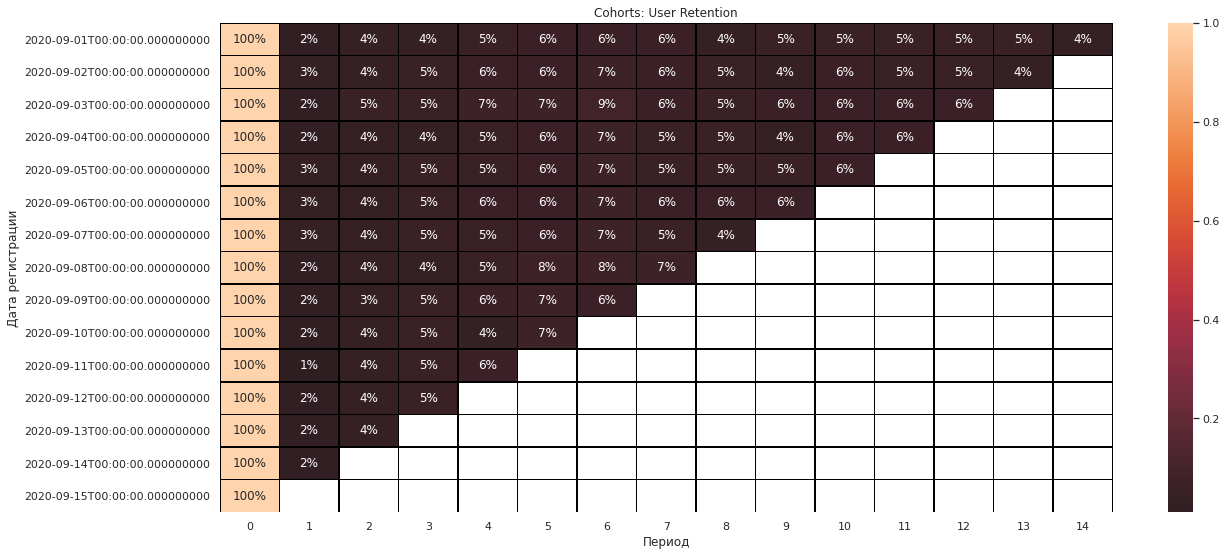

In [26]:
sns.set(style='white')
plt.figure(figsize=(20, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention,annot=True,fmt='.0%',
            linewidths=0.5,linecolor='black',center=-0.1)
plt.xlabel('Период')
plt.ylabel('Дата регистрации')

In [30]:
def get_retation(reg, auth, start_date, end_date):
    #меняем тип данных строк на даты
    start_date = dt.strptime(start_date, '%Y-%m-%d')
    end_date = dt.strptime(end_date, '%Y-%m-%d')
    
    #мержим данные
    df = df_reg.merge(df_auth)
    
    #менять тип данных у колонок
    df['reg_ts'] = pd.to_datetime(df.reg_ts, unit='s').dt.date
    df['auth_ts'] = pd.to_datetime(df.auth_ts, unit='s').dt.date
    df = df[['uid', 'reg_ts', 'auth_ts']]
    
    df.reg_ts = pd.to_datetime(df['reg_ts'], format='%Y-%m-%d')
    df.auth_ts = pd.to_datetime(df['auth_ts'], format='%Y-%m-%d')
    
    #находим разницу дней от регистрации до первой авторизации 
    df['date_diff'] = (df.auth_ts - df.reg_ts).dt.days
    
    
    #определяем когорту
    coh = df.query('reg_ts >= @start_date and auth_ts <= @end_date').groupby(['reg_ts', 'date_diff']).agg({'uid': 'nunique'}).reset_index()
    
    #находим retention
    retention = coh.pivot(index='reg_ts', columns='date_diff', values='uid')
    retention = retention.div(retention[0], axis = 0).round(2)
        
    return retention

In [31]:
retation = get_retation(df_reg, df_auth, '2020-09-01', '2020-09-15')

In [32]:
retation

date_diff,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
reg_ts,,,,,,,,,,,,,,,
2020-09-01,1.0,0.02,0.04,0.04,0.05,0.06,0.06,0.06,0.04,0.05,0.05,0.05,0.05,0.05,0.04
2020-09-02,1.0,0.03,0.04,0.05,0.06,0.06,0.07,0.06,0.05,0.04,0.06,0.05,0.05,0.04,NaN
2020-09-03,1.0,0.02,0.05,0.05,0.07,0.07,0.09,0.06,0.05,0.06,0.06,0.06,0.06,NaN,NaN
2020-09-04,1.0,0.02,0.04,0.04,0.05,0.06,0.07,0.05,0.05,0.04,0.06,0.06,NaN,NaN,NaN
2020-09-05,1.0,0.03,0.04,0.05,0.05,0.06,0.07,0.05,0.05,0.05,0.06,NaN,NaN,NaN,NaN
2020-09-06,1.0,0.03,0.04,0.05,0.06,0.06,0.07,0.06,0.06,0.06,NaN,NaN,NaN,NaN,NaN
2020-09-07,1.0,0.03,0.04,0.05,0.05,0.06,0.07,0.05,0.04,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-08,1.0,0.02,0.04,0.04,0.05,0.08,0.08,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-09,1.0,0.02,0.03,0.05,0.06,0.07,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Задание 2
Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.

Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?

In [ ]:
загрузим наши данные 

In [6]:
df = pd.read_csv('~/shared/problem2.csv', sep = ';')
df.head()

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b


In [ ]:
проведем небольшой разведочный анализ наших данных

In [7]:
df.isnull().sum()

user_id      0
revenue      0
testgroup    0
dtype: int64

In [8]:
df.user_id.nunique()

404770

In [7]:
df.describe()

,user_id,revenue
count,404770.000000,404770.000000
mean,202385.500000,26.083435
std,116847.178567,681.652928
min,1.000000,0.000000
25%,101193.250000,0.000000
50%,202385.500000,0.000000
75%,303577.750000,0.000000
max,404770.000000,37433.000000


In [128]:
# df_merged = df.groupby('testgroup', as_index = False).agg({'user_id': 'count'}) \
#                                          .merge(df.query('revenue > 0') \
#                                            .groupby('testgroup', as_index = False) \
#                                            .agg({'user_id': 'count'}), on = 'testgroup') \
#                                            .rename(columns = {'user_id_x': 'all_users', 'user_id_y': 'paying_users'})
# df_merged['percent'] = round(df_merged.paying_users / df_merged.all_users,4)
# df_merged

### Чтобы понять какой набор предложений лучше, нужно проанализировать такие метрики как ARPU, ARPPU и СR

In [10]:
df_cr = df.groupby('testgroup', as_index = False).agg({'user_id': 'count'}) \
                                         .merge(df.query('revenue > 0') \
                                           .groupby('testgroup', as_index = False) \
                                           .agg({'user_id': 'count'}), on = 'testgroup') \
                                           .rename(columns = {'user_id_x': 'all_users', 'user_id_y': 'paying_users'})
df_cr['cr'] = df_cr.paying_users / df_cr.all_users * 100
df_cr

,testgroup,all_users,paying_users,cr
0,a,202103,1928,0.953969
1,b,202667,1805,0.890624


In [100]:
df_arpu = df.groupby('testgroup', as_index = False).agg({'revenue': 'sum', 'user_id': 'count'})

In [101]:
df_arpu['arpu'] = round(df_a_b.revenue / df_a_b.user_id,2)

In [102]:
df_arpu

,testgroup,revenue,user_id,arpu
0,a,5136189,202103,25.41
1,b,5421603,202667,26.75


In [ ]:
видим что процент платящих пользователей больше в контрольной группе, однако arpu больше в тествой группе

In [97]:
df_arppu = df.query('revenue > 0').groupby('testgroup', as_index = False) \
             .agg({'revenue': 'sum', 'user_id': 'count'}) \
             .rename(columns = {'user_id': 'count_users'})

In [99]:
df_arppu['arppu'] = round(df_arppu.revenue / df_arppu.count_users,2)
df_arppu

,testgroup,revenue,count_users,arppu
0,a,5136189,1928,2664.00
1,b,5421603,1805,3003.66


In [ ]:
видим что arppu больше в тестовой группе

### Далее пострим график распределения доходов для каждой группы

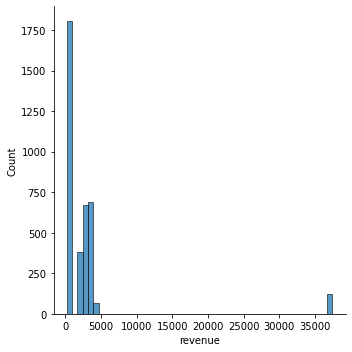

In [13]:
sns.displot(data=df.query('revenue > 0'), x="revenue", bins = 50)

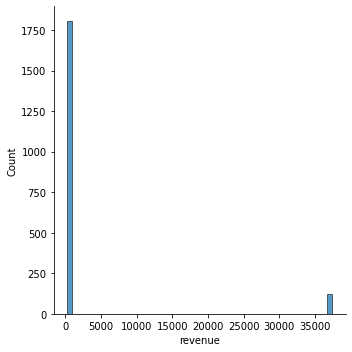

In [14]:
sns.displot(data=df.query('revenue > 0 and testgroup == "a"'), x="revenue", bins = 50)


In [15]:
df.query('revenue > 0 and testgroup == "a"').describe()

,user_id,revenue
count,1928.000000,1928.000000
mean,200152.677905,2663.998444
std,116596.504905,9049.039763
min,73.000000,200.000000
25%,99323.000000,257.000000
50%,199854.500000,311.000000
75%,299664.250000,361.000000
max,404768.000000,37433.000000


In [ ]:
попробуем посмотреть на данные отдельно, отбросив те значения которые имеют revenue > 35000

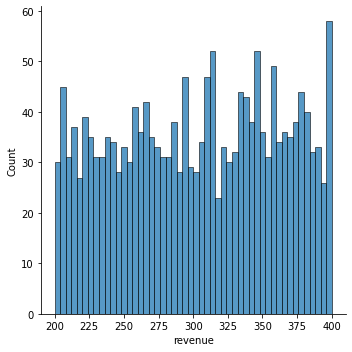

In [16]:
sns.displot(data=df.query('revenue > 0 and revenue < 35000 and testgroup == "a"'), x="revenue", bins = 50)

In [17]:
df.query('revenue > 0 and revenue < 35000 and testgroup == "a"') #странный момент если удалить значения больше 3500 то кол-во
                                                                 #user равняется 1805 то есть как и в группе b

,user_id,revenue,testgroup
72,73,351,a
341,342,290,a
385,386,250,a
712,713,255,a
1346,1347,230,a
...,...,...,...
404304,404305,360,a
404315,404316,262,a
404543,404544,369,a
404602,404603,251,a


In [ ]:
теперь посмотрим на данные в контрольной группе, которые имеют revenue > 35000

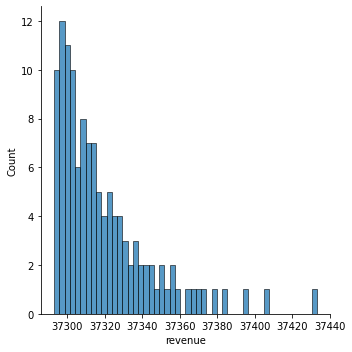

In [18]:
sns.displot(data=df.query('revenue > 35000 and testgroup == "a"'), x="revenue", bins = 50)

In [19]:
df.query('revenue > 35000 and testgroup == "a"')['user_id'].count()

123

In [ ]:
давайте посчитаем сколько процентов об общего дохода составляют выбросы в контрольной группе

In [133]:
df.query('revenue > 35000 and testgroup == "a"').revenue.sum() / df.query('testgroup == "a"').revenue.sum()

0.8937077665950377

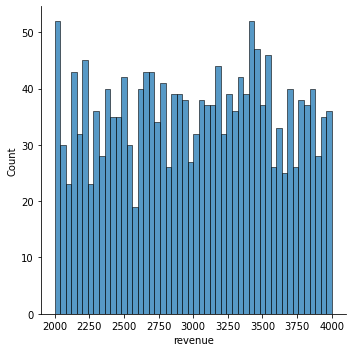

In [42]:
sns.displot(data=df.query('revenue > 0 and testgroup == "b"'), x="revenue", bins = 50)


In [21]:
df.query('revenue > 0 and testgroup == "b"').describe()

,user_id,revenue
count,1805.000000,1805.000000
mean,205834.548476,3003.658172
std,116400.045485,572.619709
min,161.000000,2000.000000
25%,106815.000000,2513.000000
50%,206651.000000,3022.000000
75%,304907.000000,3478.000000
max,404526.000000,4000.000000


## Теперь проведем статистический анализ по нашим метрикам
#### CR - CR (conversion rate, коэффициент конверсии) — процент пользователей, которые совершили целевое действие

Гипотизы:

H0 - в контрольной и тестовой группы не различаются

H1 - в контрольной и тестовой группы различаются

In [11]:
df_cr

,testgroup,all_users,paying_users,cr
0,a,202103,1928,0.953969
1,b,202667,1805,0.890624


In [15]:
ss.chi2_contingency(df_cr[['all_users', 'paying_users']])

(4.294148751290091,
 0.03824373651044168,
 1,
 array([[202166.51498275,   1864.48501725],
        [202603.48501725,   1868.51498275]]))

##### Вывод: pvalue < 0.05, а это значит что, мы отклоняем  H0 гипотизу. Таким образом, конверсия в группах имеет статистически значимые различия.

#### ARPU (average revenue per user) — это метрика, которая используется для измерения среднего дохода от каждого пользователя за конкретный период времени

Гипотизы:

H0 - в контрольной и тестовой группы не различаются

H1 - в контрольной и тестовой группы различаются

In [ ]:
проверим нормальность распределения с помошью теста шапиро-уилка

In [140]:
print(ss.shapiro(df.query("testgroup == 'a'").revenue))
print(ss.shapiro(df.query("testgroup == 'b'").revenue))

ShapiroResult(statistic=0.008876502513885498, pvalue=0.0)
ShapiroResult(statistic=0.06588172912597656, pvalue=0.0)


In [ ]:
теперь с помощью теста левена тестируем различия в дисперсиях

In [144]:
ss.levene(df.query("testgroup == 'a'").revenue, df.query("testgroup == 'b'").revenue)

LeveneResult(statistic=0.3896289474701388, pvalue=0.5324948591043842)

In [ ]:
применим t-тест

In [145]:
ss.ttest_ind(df.query('testgroup == "a"').revenue, df.query('testgroup == "b"').revenue)

Ttest_indResult(statistic=-0.6242026493616787, pvalue=0.532494858971837)

##### Вывод: pvalue > 0.05, а это значит что, мы не смогли отколнить H0 гипотизу. Таким образом, ARPU в группах не имеют стат значимых различий

#### ARPPU (Average Revenue Per Paying User) очень похож на ARPU — это тоже средний доход, но только от платящих пользователей

Гипотизы:

H0 - в контрольной и тестовой группы не различаются

H1 - в контрольной и тестовой группы различаются

In [147]:
print(ss.shapiro(df.query("testgroup == 'a' and revenue > 0").revenue))
print(ss.shapiro(df.query("testgroup == 'b' and revenue > 0").revenue))

ShapiroResult(statistic=0.2667924761772156, pvalue=0.0)
ShapiroResult(statistic=0.9583123922348022, pvalue=2.491345674771425e-22)


In [148]:
ss.levene(df.query("testgroup == 'a' and revenue > 0").revenue, df.query("testgroup == 'b' and revenue > 0").revenue)

LeveneResult(statistic=80.85567421779912, pvalue=3.779689868667878e-19)

In [ ]:
pvalue < 0.05, дисперсия в группах различаются.

In [152]:
ss.ttest_ind(df.query("testgroup == 'a' and revenue > 0").revenue,
                df.query("testgroup == 'b' and revenue > 0").revenue, equal_var=False)

Ttest_indResult(statistic=-1.6446302664300838, pvalue=0.10020780398916015)

##### Вывод: pvalue > 0.05, а это значит что, мы не смогли отколнить H0 гипотизу. Таким образом, ARPPU в группах не имеют стат значимых различий

### Общий вывод:
#### По метрикам ARPU и ARPPU нельзя сказать какой набор предложений лучше. Статистический анализ показал, что ARPU и ARPPU в двух группах не имеют стат значимых различий

#### Метрика conversion rate имеет стат значимые различия в двух группах. Конверсия выше в контрольной группе и исходя из этого можно сказать, что она чуть лучше показывает себя в преобразовании пользователей в платящих.

# Задание 3
#### В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. Для получения награды требуется пройти ряд уровней за определенное время. С помощью каких метрик можно оценить результаты последнего прошедшего события?

#### Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?

#### Ответ на первый вопрос:

##### Retention Rate

Данная метрика может сказать насколько тематическое событие было интересным для игроков. Мы можем увидить процентов игроков, котрые начали участие в событии и какой процент был в течение всего периода действия тематического события

##### Активность игроков

Оценить количество времени, которое игроки провели в игре во время события, и сравнить его с обычной активностью

##### Получение уникальных предметов

С помощью данной метрики мы можем оценить количество игроков, которые получили уникальные предметы рамках  данного события.

##### Conversion Rate

Данная метрика позволит нам оценить процент игроков, которые успешно завершили все уровни события в отведенное время

#### Ответ на второй вопрос:

Набор метрик измениться в случае усложнения механики игры. Новые метрики, которых стоит добавить:

##### Время прохождения уровней

Данная метрика позволит нам измерить среднее время, которое игроки тратят на прохождение уровней в усложненном событии.

##### Число откатов

C помощью данной метрики можем ценить количество раз, когда игроки откатывались на несколько уровней назад из-за неудачных попыток выполнения уровня